In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset=dataset.astype(int)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [5]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [6]:
independent=dataset[['age','bmi', 'children','sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27,0,0,1
1,18,33,1,1,0
2,28,33,3,1,0
3,33,22,0,1,0
4,32,28,0,1,0
...,...,...,...,...,...
1333,50,30,3,1,0
1334,18,31,0,0,0
1335,18,36,0,0,0
1336,21,25,0,0,0


In [7]:
dependent=dataset[["charges"]]
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent, test_size=0.30, random_state=0)

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor=regressor.fit(X_train,y_train)

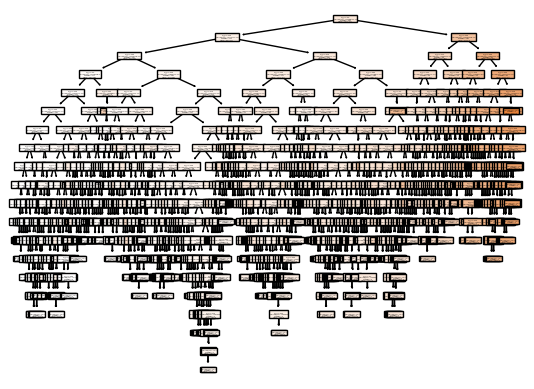

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor,filled=True)
plt.show()

In [11]:
y_pred=regressor.predict(X_test)
y_pred

array([ 9748.        ,  8930.        , 44202.        , 13143.        ,
        9264.        , 21984.        ,  1615.        , 10381.        ,
        7144.        ,  5253.        ,  4766.        , 30284.        ,
       32108.        ,  4992.        , 20745.        , 10264.        ,
       12629.        ,  3292.        ,  6455.        , 33307.        ,
       24667.        , 10806.        ,  9625.        , 21774.        ,
        1391.        ,  4076.        ,  3161.        ,  7209.        ,
        3353.        ,  8520.        ,  7201.        , 47896.        ,
       13981.        , 10713.        , 16115.        ,  3554.        ,
        8978.        , 44585.        , 40941.        ,  1880.        ,
       21984.        ,  2866.        , 21659.        , 44423.        ,
       36307.        ,  3056.        , 10106.        ,  7046.        ,
        4719.        , 11830.        ,  2664.        ,  4296.        ,
       26109.        , 60021.        , 11856.        , 19673.        ,
      

In [12]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.6809957419713819

In [13]:
regressor.feature_importances_

array([0.15307876, 0.20232124, 0.03440346, 0.01209114, 0.5981054 ])

In [14]:
regressor.max_features_

5

In [15]:
regressor.tree_

In [16]:
import pickle
filename='Finalized_Insurance_DTree_Regresion.sav'

In [17]:
pickle.dump(regressor,open(filename,'wb'))

In [18]:
loaded_model=pickle.load(open("Finalized_Insurance_DTree_Regresion.sav",'rb'))

In [19]:
#input Parameter
age_input=float(input("Age :")) 
bmi_input=float(input("BMI :"))
child_input=float(input("Children:"))
sex_input=int(input("Sex 0 or 1 :"))
smok_input=int(input("Smoker 0 or 1 :"))

Age :19
BMI :29
Children:0
Sex 0 or 1 :0
Smoker 0 or 1 :1


In [20]:
result=loaded_model.predict([[age_input, bmi_input, child_input, sex_input, smok_input]])
print("Predicted Charges :",result)

Predicted Charges : [17432.33333333]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
